# Data analytics project


#### Lecturer name: Dr Lihi drai





*Made by: Uriel levy, Daniel tzumi, Dan sa'adya, Artem Goncharov*


**Introduction:**

We decided to do our project about meeting apps. we had few meeting apps and eventually we chose the the one that most fit for us that called "Lovoo". Our dataset contains female user profile infos and was gathered during spring 2015 (april, may). 

![download.jpg](https://media.istockphoto.com/vectors/handwritten-typography-lettering-of-lets-go-isolated-on-white-vector-id1214291804?k=20&m=1214291804&s=612x612&w=0&h=GN18U0HhC3p2sOwbD_gld3ZUpkd4qsa2OKHodpxQRGY=)

In [23]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
# import os ### need it?
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS

In [25]:
link='https://raw.githubusercontent.com/tema455/Project-1/main/lovoo_v3_users_api-results%20(1).csv'
df=pd.read_csv(link)

# Data details:

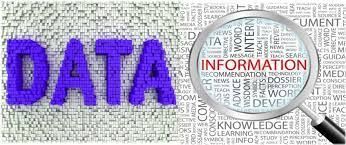

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3992 non-null   object 
 1   genderLooking           3992 non-null   object 
 2   age                     3992 non-null   int64  
 3   name                    3992 non-null   object 
 4   counts_details          3992 non-null   float64
 5   counts_pictures         3992 non-null   int64  
 6   counts_profileVisits    3992 non-null   int64  
 7   counts_kisses           3992 non-null   int64  
 8   counts_fans             3992 non-null   int64  
 9   counts_g                3992 non-null   int64  
 10  flirtInterests_chat     3992 non-null   bool   
 11  flirtInterests_friends  3992 non-null   bool   
 12  flirtInterests_date     3992 non-null   bool   
 13  country                 3992 non-null   object 
 14  city                    3706 non-null   

![download.gif](https://c.tenor.com/H7aFDoovJt8AAAAd/goals-us.gif)

# Number of users by age:

In [27]:
df['age'].value_counts()

22    721
21    612
23    596
24    534
20    530
19    523
25    356
26    117
28      1
18      1
27      1
Name: age, dtype: int64

#### We can see that for certain ages theres only one user, then were decided to normalize the data by dropping them, so it won't influence our Statistics.

In [28]:
df = df[(df['age'] < 27) & (df['age'] != 18)]

# Grapf 1              

#### 'Spearman' method used since there's binarri values in the data.         

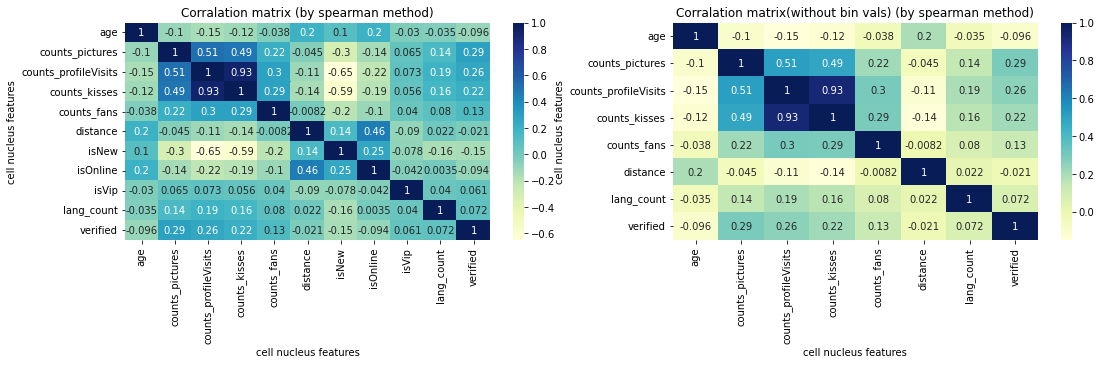

In [29]:
method = 'spearman'
corr_columns_1 = ['age', 'counts_pictures','counts_profileVisits' , 'counts_kisses' , 'counts_fans',
                'distance', 'isNew', 'isOnline','isVip','lang_count', 'verified']

corr_columns_2=['age', 'counts_pictures','counts_profileVisits' , 'counts_kisses' , 'counts_fans',
                'distance', 'lang_count', 'verified']

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.heatmap(df[corr_columns_1].corr(method),annot = True,cmap = 'YlGnBu')
plt.title(f'Corralation matrix (by {method} method)')
plt.xlabel("cell nucleus features")
plt.ylabel("cell nucleus features")
plt.subplot(1,2,2)
sns.heatmap(df[corr_columns_2].corr(method),annot = True,cmap = 'YlGnBu')
plt.title(f'Corralation matrix(without bin vals) (by {method} method)')
plt.xlabel("cell nucleus features")
plt.ylabel("cell nucleus features")
plt.show()

# Corralation conclusions:

 - Very strong positive corralation between **counts_kisses & counts_profileVisits** (0.93). The connection can explained by the fact that those users who liked this profile were probably visit him before. Another strong connections appear between **counts_fans & counts_kisses / counts_profileVisits**(0.29,0.3). That means that users who are attractive get lot of hits and by that they get followed by others/

 - Strong positive connection between **counts_profileVisits & counts_pictures** (0.51). It can explained by the fact that users whom upload more pictures are considered more atrractive then others, which represent with more hits to their profiles. In addition, because of the connection wev'e mention earlier there's a high corralation between **counts_kisses & counts_pictures** (0.49) also.  That means that the chance of getting like by others is higher as if a profile has more pictures.

- Another strong positive connection was found amoung **isOnline & distance** (0.46). That means that each individuals who were matched and close to one another were online more than the ones who had a high distance between them. We can assume that those who were close to each other were more motivated to chat often and to keep the conversation alive more then the pair which was a long distance between them . 

- Strong negative connection between **isNew & counts_profileVisits / counts_kisses** (-0.65,-0.59).  That shows that new users appear less attractive than experienced ones and that result by low amount of likes. We offered that their low experience with the app might cause that by several reasons:
    - Low amount of pics, as it shown above **isNew & counts_pictures** (-0.3).
    - The pics ther'e do upload are unattractive.
    - The app algorithm recognize them as less attractive due to their behavior.              

# Graph 2

#### This graph shows the most popular words within the users bios. 

In [31]:
df.whazzup.isna().sum()

1592

In [32]:
whazzupd_dropNA = df.whazzup.dropna()

In [33]:
#Here we'r droping out girls without any bio, and that's not a small number.       RAW

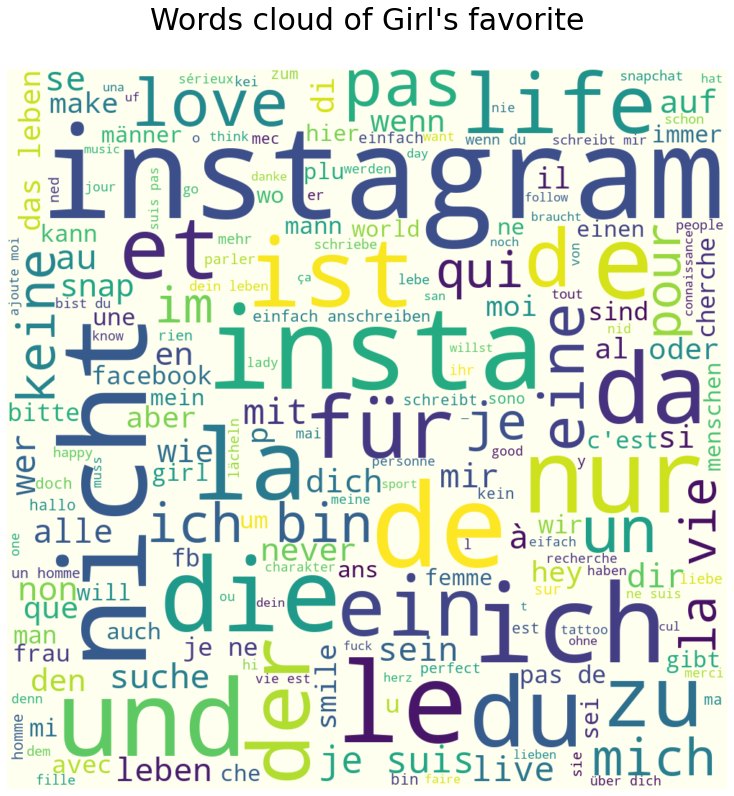

In [35]:
comment_words = ''
stopwords = set(STOPWORDS)
for words in whazzupd_dropNA:
     
    words = str(whazzupd_dropNA)
 
    tokens = words.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words = ' '.join(whazzupd_dropNA).lower()

wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='#FFFFF0',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                    
plt.figure(figsize = (10, 10), facecolor = 'None')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Words cloud of Girl\'s favorite\n', fontsize = 30)
plt.show()


# Conclusions:

![download.gif](https://c.tenor.com/NgDB2XehD4AAAAAC/social-media.gif)




- The most common social networks we found are facebook Spnapchat and Instegram. That means they're most popular within "Lovoo" users. In addition we would like to claim, that though 'twitter' is common also it's not appear here because theres no interpersonal connection there in contrast to face\instegram or twitter. Another point to discuss about users who write down their social networks is for appear atrracter more. Because in that way you can verify the account on another network in order to get to know the person better, and know more details about him.

- The words love, life, perfect, smile, happy, and good  found a lot even though they're in english and Lovoo running in europe. The reason for that is these words convey positivity and by that profiles might seen more attractive then regular profiles.
  

- There are a few words in several languages with the meaning of: "man", "serious", "dominnant", "height", "sensitive".. The common for all those words is the quality of a the person the users were looking for. In regard to that it can assume that those users were tired of getting lots of likes and they try to filter their suggestions.



# Graph 3              

In [38]:
df2 = df
dummies = ['flirtInterests_chat','flirtInterests_friends', 'flirtInterests_date']

df2['Team No.'] = df2[dummies].cumsum(axis=1).ne(1).sum(axis=1)

In [39]:
df2['count'] = df2[dummies].sum(axis=1)
df2_one_p = df2[df2['count'] == 1]
df2_one_p['Team No.'] = df2_one_p[dummies].cumsum(axis=1).ne(1).sum(axis=1)
# df2_one_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


***
## Team's numbers describe the interest of the person, what she is looking for:


*   Chat=0
*   Friends=1
*   Date=2




***

In [40]:
target = 'flirtInterests_friends' # ['flirtInterests_chat','flirtInterests_friends', 'flirtInterests_date'] for onother data group check*
df2_one_p[[target,'Team No.']][df2_one_p[target] == True]
chat = 0
friends = 1
date = 2
df2_one_p[['flirtInterests_chat','Team No.']]

,flirtInterests_chat,Team No.
2,False,2
4,True,0
6,False,1
12,True,0
14,False,2
...,...,...
3984,True,0
3987,False,2
3989,False,1
3990,False,1


<Figure size 144x360 with 0 Axes>

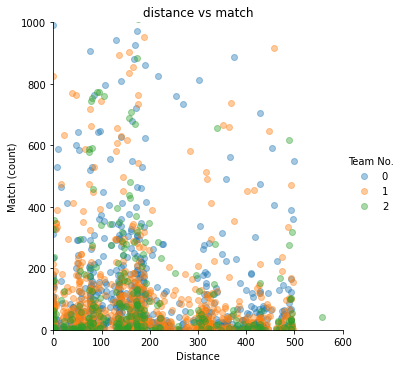

In [41]:

plt.figure(figsize=(2,5))
sns.lmplot(x='distance',y='counts_kisses',data=df2_one_p,hue='Team No.',fit_reg=False,scatter_kws={'alpha':0.4})
plt.title('distance vs match')
plt.xlabel('Distance')
plt.ylabel('Match (count)')
plt.ylim(0,1000)
plt.xlim(0,600)

plt.show()

<Figure size 1440x1440 with 0 Axes>

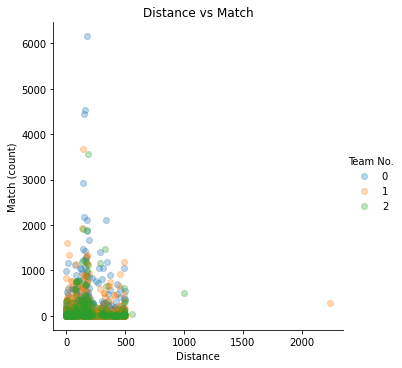

In [42]:
  plt.figure(figsize=(20,20))
sns.lmplot(x='distance',y='counts_kisses',data=df2_one_p,hue='Team No.',fit_reg=False,scatter_kws={'alpha':0.3})
plt.title('Distance vs Match')
plt.xlabel('Distance')
plt.ylabel('Match (count)')

plt.show()

# Insights from the graph



- The users who indicated being open for dating people have less matches.  It can be explained because they're more picky and have more demands then other user statuses.

- The users who indicated being in search for chat porpuses, tend to have more matches. We can infer that those users were less selective and therefore had more adjustments.

- In regards to the users whose goal is only the chat, we believe the data is scattered and not organized by distance.
 And in reality we’re seeing that even users whose goal is only to make calls prefer to make adjustments with the people who they’re close with.

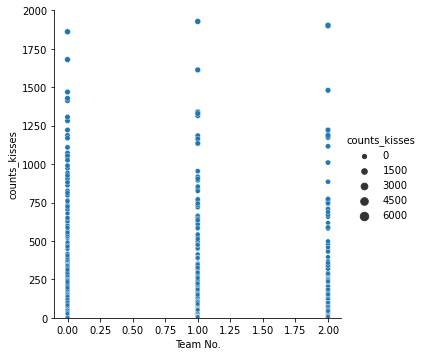

In [43]:
fg=sns.relplot(data=df2_one_p, x='Team No.', y='counts_kisses',kind='scatter',size='counts_kisses').set(ylim=(0, 2000))

We can also see a little bit,a difference between the number of likes, that users got vs the goal of their explorering.  

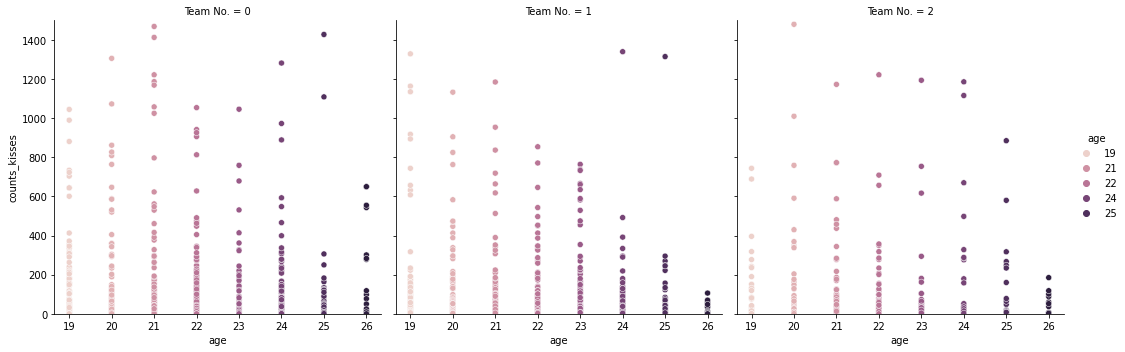

In [44]:
 sns.relplot(data=df2_one_p, x='age', y='counts_kisses',kind='scatter',col='Team No.',hue='age').set(ylim=(0, 1500))
                                                                                                         

Here we can see that the age 21 is mostly looking for chatting matches. Also that there is no age influence in the dating interests. Should check also age-world cloud and i'm pretty sure, we will see most of 'insta' using around the 21 y.o.

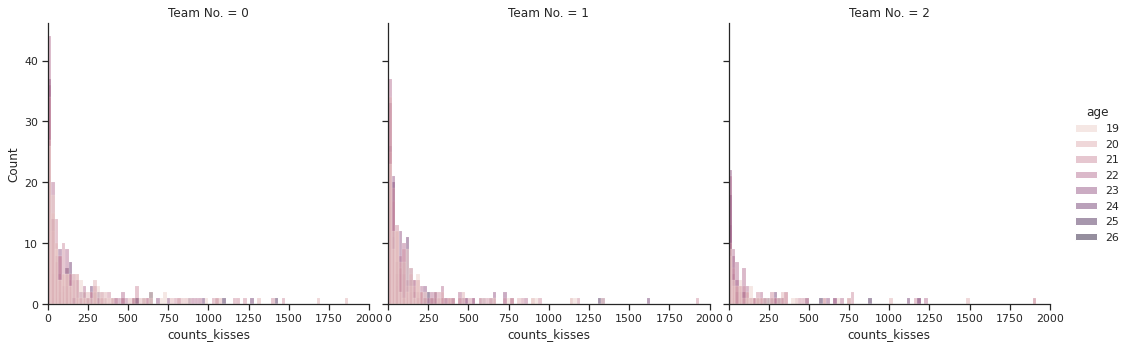

In [ ]:
sns.displot(data=df2_one_p, x='counts_kisses',kind='hist', hue='age',col='Team No.').set(xlim=(0, 2000))



Most influential age group in this episode also is the young users, so we can confidently stated that looking for "chatting" girls got most of likes and also retty sure they got there ig nam in theier bio, and this column is opened here... so talk with me, if u looking for new friends around Eroupa

![download.jpg](https://images02.military.com/sites/default/files/2021-04/chucknorris.jpeg)

Thanks for ur time and attention.